In [1]:
# install packages
import sys
%time  !{sys.executable} -m pip install numpy==1.18.1
%time  !{sys.executable} -m pip install pandas==0.24.2
%time  !{sys.executable} -m pip install matplotlib==3.2.1
%time  !{sys.executable} -m pip install scikit-learn==0.23.1
%time  !{sys.executable} -m pip install datetime==4.3
%time  !{sys.executable} -m pip install argparse==1.4.0

Wall time: 1.91 s
Wall time: 2.14 s
Wall time: 1.87 s
Wall time: 1.65 s
Wall time: 1.64 s
Wall time: 1.62 s


In [2]:
# method 1 to install 'torch'
%time  !{sys.executable} -m pip install torch==1.0.1

Wall time: 1.69 s


In [3]:
# Read database about the confirmed cases and try to filter out the area
import pandas as pd
import datetime
url="https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv"
df = pd.read_csv(url,header=0)
df = df[df['county']=='Los Angeles'][['date','place','confirmed_cases']]

target = ['Alhambra', 'Arcadia', 'Beverly Hills', 'Boyle Heights', 'Carson', 'Diamond Bar', 'Encino', 'Gardena', 'Glendale', 'Glendora',
          'Granada Hills', 'Inglewood', 'La Mirada', 'Lancaster', 'Manhattan Beach', 'Melrose', 'Northridge', 'San Dimas', 'San Pedro',
          'Santa Monica', 'Sherman Oaks', 'Silver Lake', 'Tarzana', 'Torrance', 'Venice', 'West Adams', 'West Hills', 'West Hollywood',
          'West Vernon', 'Westchester', 'Altadena', 'Baldwin Hills', 'Brentwood', 'Culver City', 'Eagle Rock', 'Hollywood',
          'Hollywood Hills', 'Lynwood', 'Mar Vista', 'Monterey Park', 'North Hollywood', 'Reseda', 'Santa Clarita', 'Woodland Hills',
          'Sylmar', 'Walnut', 'Beverlywood', 'Burbank', 'Calabasas', 'Castaic', 'Covina', 'Crestview', 'East Los Angeles', 'Echo Park', 
          'Hancock Park', 'Hawthorne', 'Lawndale', 'Lomita', 'Palms', 'Playa Vista', 'South El Monte', 'Stevenson Ranch', 'Studio City',
          'Tujunga', 'University Park', 'Valley Glen', 'Van Nuys', 'Vermont Knolls', 'Westwood', 'Whittier', 'Century City', 'El Segundo',
          'Lake Balboa', 'Lakewood', 'Miracle Mile', 'Park La Brea', 'Redondo Beach', 'San Fernando', 'South Whittier', 'Winnetka', 
          'Del Rey', 'La Canada Flintridge', 'La Verne', 'Montebello', 'Sun Valley', 'Sunland', 'Vermont Vista', 'Vernon Central',
          'West Covina', 'Westlake', 'Bellflower', 'Canoga Park', 'East Hollywood', 'Los Feliz', 'Paramount', 'Rancho Palos Verdes', 
          'South Gate', 'Agoura Hills', 'Duarte', 'Exposition Park', 'Hyde Park', 'Lincoln Heights', 'Palmdale', 'South Park',
          'Wilshire Center', 'Canyon Country', 'Claremont', 'Downey', 'Harbor Gateway', 'Harvard Heights', 'Highland Park', 
          'La Puente', 'Norwalk', 'Pico Rivera', 'Porter Ranch', 'San Gabriel', 'Wholesale District', 'Willowbrook', 'Arleta',
          'Bell Gardens', 'Glassell Park', 'Panorama City', 'Pomona', 'Valinda', 'Watts', 'Azusa', 'Bell', 'Chatsworth', 
          'Hacienda Heights', 'Harbor City', 'Leimert Park', 'Maywood', 'Monrovia', 'North Hills', 'Pacoima', 'Avalon', 'Baldwin Park',
          'Bassett', 'Central', 'El Monte', 'El Sereno', 'Harvard Park', 'Lake Los Angeles', 'Rosemead', 'Rowland Heights', 'Temple City',
          'Acton', 'Cerritos', 'Cloverdale/Cochran', 'Compton', 'Downtown', 'Huntington Park', 'Koreatown', 'Mt. Washington', 'Pasadena', 
          'South Pasadena', 'Wilmington']

df = df[df['place'].isin(target)]

In [4]:
# Change Data Type 
result = df.copy()
result['place'].replace('Silver Lake','Silverlake',inplace = True)
result['date'] = pd.to_datetime(result['date'])

In [5]:
#  Add New Columns
result = result.sort_values(by=['place','date'])
result['new_confirmed_cases'] = result['confirmed_cases']
result['ave_new7_10after'] = result['confirmed_cases']
result['ave_new6_9after'] = result['confirmed_cases']
result['ave_new8_11after'] = result['confirmed_cases']
result.iloc[0,3] = None

# Calculate Daily New Cases
for i in range(1,len(result)):
    if result.iloc[i,1] != result.iloc[(i-1),1]:
        result.iloc[i,3] = None
    else:
        result.iloc[i,3] = max([0,int(result.iloc[i,2])-int(result.iloc[(i-1),2])])    
# Calculate Future Cases in AVG
for i in range(1,len(result)):    
    if i < (len(result)-11):
        if result.iloc[i,1] == result.iloc[(i+11),1]:
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3] + result.iloc[(i+11),3])/4.0
        elif result.iloc[i,1] == result.iloc[(i+10),1]:
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/3.0
        elif result.iloc[i,1] == result.iloc[(i+9),1]:
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/3.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3])/2.0
        elif result.iloc[i,1] == result.iloc[(i+8),1]:
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3])/2.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3])/3.0
            result.iloc[i,6] = result.iloc[(i+8),3]
        elif result.iloc[i,1] == result.iloc[(i+7),1]:
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3])/2.0
            result.iloc[i,6] = result.iloc[i,4] = result.iloc[(i+7),3]
        else:
            for j in range(8):
                if result.iloc[i,1] == result.iloc[(i+7-j),1]:
                    result.iloc[i,4] = result.iloc[i,5] = result.iloc[i,6] = result.iloc[(i+7-j),3]
                    break
    else:
        if i < (len(result)-10):
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/3.0
        elif i < (len(result)-9):
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/3.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3])/2.0
        elif i < (len(result)-8):
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3])/2.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3])/3.0
            result.iloc[i,6] = result.iloc[(i+8),3]
        elif i < (len(result)-7):
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3])/2.0
            result.iloc[i,6] = result.iloc[i,4] = result.iloc[(i+7),3]
        else:          
            result.iloc[i,4] = result.iloc[i,5] = result.iloc[i,6] = result.iloc[-1,3]

result.dropna(inplace = True)            

In [6]:
import os
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import json

import zipfile as zp

In [7]:
# three functions for Apple data collection

def get_apple_link():
    '''Get link of Apple Mobility Trends report file
    
       Returns:
           link (str): link of Apple Mobility Trends report file
    '''
    # get link via API
    json_link = "https://covid19-static.cdn-apple.com/covid19-mobility-data/current/v3/index.json"
    with urllib.request.urlopen(json_link) as url:
        json_data = json.loads(url.read().decode())
    link = "https://covid19-static.cdn-apple.com" + \
        json_data['basePath'] + json_data['regions']['en-us']['csvPath']
    return link

def download_apple_report(directory="apple_reports"):
    '''Download Apple Mobility Trends report in CSV

        Args:
            directory: directory to which CSV report will be downloaded

        Returns:
            new_files (bool): flag indicating whether or not a new file has been downloaded
    '''
    new_files = False
    
    # create directory if it don't exist
    if not os.path.exists(directory) and directory!='':
        os.makedirs(directory)
    
    link = get_apple_link()
    file_name = "applemobilitytrends.csv"
    path = os.path.join(directory, file_name)
    path = os.path.join(directory, file_name)
    old_size = os.path.getsize(path) if os.path.isfile(path) else 0
    urllib.request.urlretrieve(link, path)
    new_size = os.path.getsize(path)
    if old_size!=new_size:
        new_files = True

    if not new_files:
        print('Apple: No updates')
    else:
        print('Apple: Update available')
    
    return new_files

def build_apple_report(
    source=os.path.join(
        'apple_reports',
        "applemobilitytrends.csv"),
        report_type="regions"):
    '''Build cleaned Apple report (transform dates from columns to rows, add country names for subregions and cities)
       for the worldwide or for some country (currently only for the US)

        Args:
            source: location of the raw Apple CSV report
            destination: destination file path
            report_type: two options available: "regions" - report for the worldwide, "US" - report for the US

        Returns:
           apple (DataFrame): generated Apple report
    '''
    apple = pd.read_csv(source)
    apple = apple.drop(columns=['alternative_name'])
    apple['country'] = apple.apply(
        lambda x: x['region'] if x['geo_type'] == 'country/region' else x['country'],
        axis=1)

    if report_type == 'regions':
        apple = apple[apple.geo_type != 'county']
        apple['sub-region'] = apple.apply(lambda x: 'Total' if x['geo_type'] == 'country/region' else (
            x['region'] if x['geo_type'] == 'sub-region' else x['sub-region']), axis=1)
        apple['subregion_and_city'] = apple.apply(
            lambda x: 'Total' if x['geo_type'] == 'country/region' else x['region'], axis=1)
        apple = apple.drop(columns=['region'])
        apple['sub-region'] = apple['sub-region'].fillna(
            apple['subregion_and_city'])

        apple = apple.melt(
            id_vars=[
                'geo_type',
                'subregion_and_city',
                'sub-region',
                'transportation_type',
                'country'],
            var_name='date')
        apple['value'] = apple['value'] - 100

        apple = apple.pivot_table(
            index=[
                "geo_type",
                "subregion_and_city",
                "sub-region",
                "date",
                "country"],
            columns='transportation_type').reset_index()
        apple.columns = [t + (v if v != "value" else "")
                         for v, t in apple.columns]
        apple = apple.loc[:,
                          ['country',
                           'sub-region',
                           'subregion_and_city',
                           'geo_type',
                           'date',
                           'driving',
                           'transit',
                           'walking']]
        apple = apple.sort_values(by=['country',
                                      'sub-region',
                                      'subregion_and_city',
                                      'date']).reset_index(drop=True)
    elif report_type == "US":
        apple = apple[apple.country == "United States"].drop(columns=[
                                                             'country'])
        apple['sub-region'] = apple['sub-region'].fillna(
            apple['region']).replace({"United States": "Total"})
        apple['region'] = apple.apply(lambda x: x['region'] if (
            x['geo_type'] == 'city' or x['geo_type'] == 'county') else 'Total', axis=1)
        apple = apple.rename(
            columns={
                'sub-region': 'state',
                'region': 'county_and_city'})

        apple = apple.melt(
            id_vars=[
                'geo_type',
                'state',
                'county_and_city',
                'transportation_type'],
            var_name='date')
        apple['value'] = apple['value'] - 100

        apple = apple.pivot_table(
            index=[
                'geo_type',
                'state',
                'county_and_city',
                'date'],
            columns='transportation_type').reset_index()
        apple.columns = [t + (v if v != "value" else "")
                         for v, t in apple.columns]

        apple = apple.loc[:, ['state', 'county_and_city', 'geo_type',
                              'date', 'driving', 'transit', 'walking']]
        apple = apple.sort_values(
            by=['state', 'county_and_city', 'geo_type', 'date']).reset_index(drop=True)
    return apple

In [8]:
#Read Apple data
new_files_status_apple = download_apple_report()
apple_mobility = build_apple_report(report_type="US")
apple_mobility

# Select data for Los Angeles
apple_mobility = apple_mobility[apple_mobility['county_and_city']=='Los Angeles']
apple_mobility['driving'] = apple_mobility['driving']+100
apple_mobility['transit'] = apple_mobility['transit']+100
apple_mobility['walking'] = apple_mobility['walking']+100


Apple: No updates


In [9]:
# Read google Mobility Data
url3 = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=04188f017409e90a"
google_mobility = pd.read_csv(url3)

c:\users\hp\pycharmprojects\test1\venv\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# Edit Mobility Data for Merging

#Apple mobility
amobility = apple_mobility.copy()
amobility = amobility[['date','driving','transit','walking']]

amobility['date'] = pd.to_datetime(amobility['date'])

#Google mobility
google_mobility = google_mobility[google_mobility['sub_region_2'] == 'Los Angeles County']

gmobility = google_mobility[['date','retail_and_recreation_percent_change_from_baseline',
                       'grocery_and_pharmacy_percent_change_from_baseline',
                       'parks_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline',
                       'workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline',]].copy()
gmobility['date'] = pd.to_datetime(google_mobility['date'])

In [11]:
amobility

,date,driving,transit,walking
32436,2020-01-13,100.00,100.00,100.00
32437,2020-01-14,105.93,103.78,105.72
32438,2020-01-15,112.23,105.28,111.35
32439,2020-01-16,111.73,103.12,111.68
32440,2020-01-17,130.20,109.34,134.45
32441,2020-01-18,122.30,92.96,154.54
32442,2020-01-19,92.49,76.92,116.52
32443,2020-01-20,101.89,93.71,109.02
32444,2020-01-21,108.51,112.40,107.66
32445,2020-01-22,111.56,110.84,110.91


In [12]:
gmobility

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1335743,2020-02-15,1.0,0.0,13.0,-1.0,-1.0,0.0
1335744,2020-02-16,4.0,-1.0,27.0,-1.0,0.0,-1.0
1335745,2020-02-17,7.0,0.0,30.0,-11.0,-32.0,7.0
1335746,2020-02-18,-1.0,0.0,11.0,2.0,2.0,0.0
1335747,2020-02-19,-1.0,-1.0,13.0,1.0,2.0,0.0
1335748,2020-02-20,1.0,0.0,11.0,2.0,2.0,-1.0
1335749,2020-02-21,1.0,0.0,7.0,0.0,2.0,0.0
1335750,2020-02-22,-1.0,-1.0,-13.0,-5.0,1.0,1.0
1335751,2020-02-23,4.0,1.0,13.0,0.0,2.0,0.0
1335752,2020-02-24,1.0,-1.0,8.0,2.0,4.0,-1.0


In [13]:
# Read and Modify Econ Data
url4 = "https://raw.githubusercontent.com/skasralikar/Risk-Score-1-UMichZJU/master/data/input/econ_level.csv"
econ = pd.read_csv(url4, index_col = 0)
econ.columns = ['place','Density_Per_Sq_Mile','population','Income_level']

In [14]:
# Merge Mobility Data
final = result.merge(amobility,how = 'left',on = 'date')
final_result = final.merge(gmobility,how = 'left',on = 'date')
final_result.dropna(inplace = True)

# Merge Econ Data
final_results = final_result.merge(econ, how = 'left', on = 'place')

In [15]:
final_results['ZIP'] = final_results['place']
final_results['ZIP'].astype(str)
final_results['date'].astype(str)

LA_daily = final_results[['ZIP','date','confirmed_cases','new_confirmed_cases','population','Density_Per_Sq_Mile','Income_level','driving','transit',
                          'walking','retail_and_recreation_percent_change_from_baseline',
                          'grocery_and_pharmacy_percent_change_from_baseline',
                          'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                          'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',
                          'ave_new7_10after','ave_new6_9after','ave_new8_11after']]

LA_daily_predict = final_results[['ZIP','date','confirmed_cases','new_confirmed_cases','population','Density_Per_Sq_Mile','Income_level','driving',
                                  'transit','walking','retail_and_recreation_percent_change_from_baseline',
                                  'grocery_and_pharmacy_percent_change_from_baseline',
                                  'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                                  'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',
                                  'ave_new7_10after']]


In [16]:
LA_daily.head(10)

,ZIP,date,confirmed_cases,new_confirmed_cases,population,Density_Per_Sq_Mile,Income_level,driving,transit,walking,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,ave_new7_10after,ave_new6_9after,ave_new8_11after
0,Acton,2020-04-03,1,0.0,6522,166,2,52.04,26.30,52.60,-43.0,-15.0,-38.0,-51.0,-51.0,25.0,1.00,1.00,0.00
1,Acton,2020-04-04,1,0.0,6522,166,2,44.77,22.14,48.28,-50.0,-20.0,-54.0,-51.0,-41.0,20.0,0.00,1.00,0.00
2,Acton,2020-04-05,1,0.0,6522,166,2,33.92,19.22,36.02,-53.0,-27.0,-59.0,-57.0,-43.0,17.0,0.00,0.00,0.00
3,Acton,2020-04-06,1,0.0,6522,166,2,40.81,21.76,37.63,-49.0,-27.0,-58.0,-59.0,-54.0,25.0,0.00,0.00,1.00
4,Acton,2020-04-07,1,0.0,6522,166,2,41.36,22.16,38.13,-51.0,-30.0,-58.0,-58.0,-54.0,26.0,1.00,0.00,1.00
5,Acton,2020-04-08,1,0.0,6522,166,2,42.38,21.82,41.92,-49.0,-27.0,-51.0,-57.0,-55.0,26.0,1.00,1.00,1.00
6,Acton,2020-04-09,1,0.0,6522,166,2,40.85,19.10,35.31,-55.0,-34.0,-69.0,-65.0,-57.0,29.0,1.00,1.00,1.25
7,Acton,2020-04-10,5,4.0,6522,166,2,48.47,21.70,45.50,-49.0,-22.0,-55.0,-58.0,-57.0,29.0,1.25,1.00,0.75
8,Acton,2020-04-11,5,0.0,6522,166,2,46.57,21.66,50.85,-51.0,-19.0,-54.0,-52.0,-43.0,20.0,0.75,1.25,0.75
9,Acton,2020-04-12,5,0.0,6522,166,2,30.88,17.80,31.73,-64.0,-38.0,-69.0,-60.0,-46.0,18.0,0.75,0.75,0.75


In [17]:
LA_daily_predict.head(10)

,ZIP,date,confirmed_cases,new_confirmed_cases,population,Density_Per_Sq_Mile,Income_level,driving,transit,walking,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,ave_new7_10after
0,Acton,2020-04-03,1,0.0,6522,166,2,52.04,26.30,52.60,-43.0,-15.0,-38.0,-51.0,-51.0,25.0,1.00
1,Acton,2020-04-04,1,0.0,6522,166,2,44.77,22.14,48.28,-50.0,-20.0,-54.0,-51.0,-41.0,20.0,0.00
2,Acton,2020-04-05,1,0.0,6522,166,2,33.92,19.22,36.02,-53.0,-27.0,-59.0,-57.0,-43.0,17.0,0.00
3,Acton,2020-04-06,1,0.0,6522,166,2,40.81,21.76,37.63,-49.0,-27.0,-58.0,-59.0,-54.0,25.0,0.00
4,Acton,2020-04-07,1,0.0,6522,166,2,41.36,22.16,38.13,-51.0,-30.0,-58.0,-58.0,-54.0,26.0,1.00
5,Acton,2020-04-08,1,0.0,6522,166,2,42.38,21.82,41.92,-49.0,-27.0,-51.0,-57.0,-55.0,26.0,1.00
6,Acton,2020-04-09,1,0.0,6522,166,2,40.85,19.10,35.31,-55.0,-34.0,-69.0,-65.0,-57.0,29.0,1.00
7,Acton,2020-04-10,5,4.0,6522,166,2,48.47,21.70,45.50,-49.0,-22.0,-55.0,-58.0,-57.0,29.0,1.25
8,Acton,2020-04-11,5,0.0,6522,166,2,46.57,21.66,50.85,-51.0,-19.0,-54.0,-52.0,-43.0,20.0,0.75
9,Acton,2020-04-12,5,0.0,6522,166,2,30.88,17.80,31.73,-64.0,-38.0,-69.0,-60.0,-46.0,18.0,0.75


In [18]:
LA_daily.tail(10)

,ZIP,date,confirmed_cases,new_confirmed_cases,population,Density_Per_Sq_Mile,Income_level,driving,transit,walking,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,ave_new7_10after,ave_new6_9after,ave_new8_11after
21561,Woodland Hills,2020-08-02,645,5.0,59661,4040,2,95.16,38.03,105.03,-33.0,-12.0,-3.0,-37.0,-23.0,8.0,5.250000,4.250000,4.500000
21562,Woodland Hills,2020-08-03,648,3.0,59661,4040,2,107.79,48.82,110.12,-28.0,-11.0,-2.0,-39.0,-41.0,13.0,4.500000,5.250000,4.250000
21563,Woodland Hills,2020-08-04,651,3.0,59661,4040,2,107.59,48.02,110.84,-29.0,-10.0,0.0,-39.0,-42.0,14.0,4.250000,4.500000,5.666667
21564,Woodland Hills,2020-08-05,668,17.0,59661,4040,2,108.24,48.72,112.06,-29.0,-11.0,0.0,-39.0,-42.0,14.0,5.666667,4.250000,4.000000
21565,Woodland Hills,2020-08-06,674,6.0,59661,4040,2,110.75,47.89,115.52,-30.0,-11.0,-1.0,-39.0,-42.0,15.0,4.000000,5.666667,6.000000
21566,Woodland Hills,2020-08-07,687,13.0,59661,4040,2,125.32,49.93,131.55,-31.0,-10.0,-2.0,-38.0,-41.0,15.0,6.000000,4.000000,6.000000
21567,Woodland Hills,2020-08-08,692,5.0,59661,4040,2,117.60,43.23,137.38,-34.0,-9.0,-10.0,-35.0,-22.0,9.0,6.000000,6.000000,6.000000
21568,Woodland Hills,2020-08-09,697,5.0,59661,4040,2,96.54,38.63,109.65,-33.0,-13.0,0.0,-37.0,-23.0,7.0,6.000000,6.000000,6.000000
21569,Woodland Hills,2020-08-10,704,7.0,59661,4040,2,105.12,49.31,110.99,-29.0,-13.0,-1.0,-39.0,-41.0,13.0,6.000000,6.000000,6.000000
21570,Woodland Hills,2020-08-11,704,0.0,59661,4040,2,108.21,49.51,112.29,-29.0,-12.0,1.0,-39.0,-42.0,14.0,6.000000,6.000000,6.000000


In [19]:
#feature table
features = LA_daily[['ZIP','date','confirmed_cases','population', 'Income_level','driving','transit',
                          'walking','retail_and_recreation_percent_change_from_baseline',
                          'grocery_and_pharmacy_percent_change_from_baseline',
                          'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                          'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']]
features1 = features.groupby(['ZIP']).mean()
features1.to_csv('features.csv')

In [20]:
#time series table
time_series = features.pivot(index = 'ZIP', columns = 'date', values = ['confirmed_cases','population', 'Income_level','driving','transit',
                          'walking','retail_and_recreation_percent_change_from_baseline',
                          'grocery_and_pharmacy_percent_change_from_baseline',
                          'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                          'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline'])
time_series = time_series.fillna(0)
time_series.to_csv('timeseries.csv')

In [21]:
# parameter_daily.py
"""    super parameter     """
day_input = 6                      # how many days' feature we use to predict
timelagging = 6                     # the length of latent window of Social Distancing data & Mobility data
average_num = 4                     # how many days does the average cases get from
feature_num = 14+2*(day_input-1)    # the number of feature that one input contains

In [22]:
# dataset_daily.py
import torch
import pandas as pd
from sklearn import model_selection
from torch.utils.data import Dataset, DataLoader
#from parameter_daily import day_input, average_num, feature_num, timelagging

class Mydataset(Dataset):
    def __init__(self, input, output):
        super(Mydataset, self).__init__()
        self.input = input
        self.lable = output

    def __getitem__(self, index):
        return self.input[index], self.lable[index]

    def __len__(self):
        return len(self.input)

"""    read daily data in and clean!     """
def dataset_generate_daily():
#     filename = "LA_daily.csv"
    community_daily = LA_daily.copy()
#     pd.read_csv(filename, encoding="ISO-8859-1", dtype={'ZIP': str, 'date': str})
    community = community_daily['ZIP']  # 'ZIP' column
    date = community_daily['date']  # we have to preserve the date
    del community_daily['ZIP']  # delete the non-numeric columns
    del community_daily['date']
    community_daily = pd.DataFrame(community_daily, dtype=float)  # change the type from 'int' to 'float'
    community_daily['ZIP'] = community  # add the 'ZIP' column again

    # key: 'community', value: feature that belong to the 'community'
    data_dict = {}
    for i, community in enumerate(community_daily[:]['ZIP']):
        if community not in data_dict:
            data_dict[community] = []
        feature = []
        for f in community_daily.iloc[i]:
            feature.append(f)
        data_dict[community].append(feature)

    data_x = []  # input
    data_y = []  # lable
    for key, values in data_dict.items():
        l = len(values)
        input_num = l - timelagging - average_num  # determine how many input here
        feature = []
        for i in range(input_num):  # one input point contains 6 days's data, that is day1~day6
            first = True
            for j in range(day_input):
                if first:  # one input point contains all the feature of day1
                    for k in values[i][:-4]:
                        feature.append(k)
                    first = False
                else:  # for day2~day6, one input point only contains confirmed_cases & new_confirmed_cases
                    feature.append(values[i + j][0])
                    feature.append(values[i + j][1])
            data_y.append(values[i][-4])  # output: average cases, that is ave_new7_10after
            tmp = []
            tmp.append(feature)
            data_x.append(tmp)  # size: [1, feature_num]
            feature = []
    # split data to train and test, and split test to validation and test in the following.
    train_x, test_x, train_y, test_y = model_selection.train_test_split(data_x, data_y, test_size=0.3,
                                                                        random_state=1)

    train_x_ls = []  # Change the format for later processing
    for j in train_x:
        for i in j:
            train_x_ls.append(i)
    train_x_df = pd.DataFrame(train_x_ls)
    train_y_df = pd.DataFrame(train_y)
    train_x_mean = train_x_df.mean()  # train_x dataset mean
    train_x_std = train_x_df.std()  # train_x dataset std
    train_y_mean = train_y_df.mean()  # train_y dataset mean
    train_y_std = train_y_df.std()  # train_y dataset std

    for i in range(len(train_x)):       # using train_x mean and train_x std to normalize
        for j in range(len(train_x[i])):
            for k in range(len(train_x[i][j])):
                train_x[i][j][k] = (train_x[i][j][k] - train_x_mean[k]) / train_x_std[k]

    for i in range(len(train_y)):       # using train_y mean and train_y std to normalize
        train_y[i] = (train_y[i] - train_y_mean) / train_y_std

    for i in range(len(test_x)):        # using train_x mean and train_x std to normalize
        for j in range(len(test_x[i])):
            for k in range(len(test_x[i][j])):
                test_x[i][j][k] = (test_x[i][j][k] - train_x_mean[k]) / train_x_std[k]

    for i in range(len(test_y)):        # using train_y mean and train_y std to normalize
        test_y[i] = (test_y[i] - train_y_mean) / train_y_std

    # split test to validation and test
    validation_x, test_x, validation_y, test_y = model_selection.train_test_split(test_x, test_y, test_size=0.5,
                                                                                  random_state=1)
    train_x = torch.tensor(train_x)
    train_y = torch.tensor(train_y).reshape(-1, 1)
    validation_x = torch.tensor(validation_x)
    validation_y = torch.tensor(validation_y).reshape(-1, 1)
    test_x = torch.tensor(test_x)
    test_y = torch.tensor(test_y).reshape(-1, 1)

    # define dataset
    train_data = Mydataset(train_x, train_y)
    trainloader = DataLoader(train_data, batch_size=256, shuffle=True)

    return trainloader, train_x, train_y, validation_x, validation_y, \
           test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std

In [23]:
# function.py
import torch

"""     scale the output value back to its original size and cal the loss   """
def loss_cal(predict, lable, train_mean, train_std):
    x = predict[:]
    y = lable[:]
    for i in range(len(predict)):
        x[i][0] = x[i][0] * torch.tensor(train_std) + torch.tensor(train_mean)
        y[i][0] = y[i][0] * torch.tensor(train_std) + torch.tensor(train_mean)
    loss_fun = torch.nn.MSELoss()
    loss = loss_fun(x, y)
    return loss, x, y

"""     change the learning rate   """
def adjust_learning_rate(optimizer, learning_r=None):
    i = 0
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_r
        if i == 0:
            print("optimizer lr : {}".format(param_group['lr']))
            i += 1


"""     define LSTM model   """
class Net(torch.nn.Module):
    def __init__(self, feature_num):
        super(Net, self).__init__()
        # if batch_first=True, then input shape = (batch, seq, shape)
        self.lstm = torch.nn.LSTM(input_size=feature_num, hidden_size=64, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(64 * 1, 32)
        self.linear1 = torch.nn.Linear(32, 1)

    def forward(self, x):
        # print(x.shape)
        x, _ = self.lstm(x)
        x = x.reshape(-1, 64 * 1)
        x = self.linear(x)
        x = self.linear1(x)
        return x

In [24]:
# train_daily.py
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from dataset_daily import dataset_generate_daily
#from function import loss_cal, adjust_learning_rate, Net
#from parameter_daily import feature_num


def train_daily():
    """         
    train a LSTM model with the daily dataset
    return: train_loss_info, val_loss_info
    """
    trainloader, train_x, train_y, validation_x, validation_y, test_x, test_y, \
    train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate_daily()

    """         training start!         """
    # determine optimizer, loss_function and checkpoint path
    model = Net(feature_num)
    learning_r = 0.0002
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_r)
    loss_fun = torch.nn.MSELoss()
    path = 'checkpoint_latest.tar'

    """ if you want train your model from a pre-trained model, uncomment the following code. """
    # checkpoint = torch.load(path)
    # model.load_state_dict(checkpoint['net'])
    # optimizer.load_state_dict(checkpoint['optimizer'])
    # validation_loss = checkpoint['best_validation_loss']
    # learning_r = 6.400000000000004e-8

    model.train()
    # val_loss_info = [validation_loss]
    val_loss_info = []      # preserve every epoch's train loss
    train_loss_info = []    # preserve every epoch's validation loss
    not_improve = 0
    for epoch in range(1500):
        for i, values in enumerate(trainloader):
            input, lable = values
            output = model(input)
            loss = loss_fun(output, lable)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0 and epoch > 0:
            train_loss = loss_fun(model(train_x),train_y).item()
            vali_loss = loss_fun(model(validation_x), validation_y).item()
            if len(val_loss_info) == 0 or vali_loss < min(val_loss_info):  # save the best model
                not_improve = 0
                state = {'net': model.state_dict(), 'optimizer': optimizer.state_dict(),'best_validation_loss': vali_loss}
                torch.save(state, path)
                print("Saved the model.")
            else:                           # if validation loss didn't decrease, reload the best model in next epoch.
                checkpoint = torch.load(path)
                model.load_state_dict(checkpoint['net'])
                optimizer.load_state_dict(checkpoint['optimizer'])
                not_improve += 1
                print("not_improve : {}".format(not_improve))
            if (not_improve+1) % 8 == 0:    # when validation loss doesn't decrease for 7 epochs, reduce the learning rate.
                learning_r *= 0.2
                adjust_learning_rate(optimizer, learning_r)
            if (not_improve+1) % 25 == 0:   # early stopping
                print("Training End......")
                break

            print("epoch:{}, train_loss:{}, vali_loss: {}".format(epoch, train_loss, vali_loss))
            train_loss_info.append(train_loss)
            val_loss_info.append(vali_loss)

    return train_loss_info, val_loss_info

In [25]:
# test_daily.py
import pandas as pd
import torch
import matplotlib.pyplot as plt
#from function import loss_cal, adjust_learning_rate, Net
#from parameter_daily import feature_num
import numpy as np


def test_daily(path, test_x, test_y, train_mean, train_std):
    """
    test the LSTM model with the daily dataset
    arg:path, test_x, test_y, train_mean, train_std
    no return
    """
    """     test start!     """
    # using the test dataset to test model
    model = Net(feature_num)
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['net'])
    model.eval()
    predict = model(test_x)
    real = test_y.clone()

    loss_fun = torch.nn.MSELoss()
    # two losses, one is normalized scale, another is original scale
    loss = loss_fun(predict, real)
    loss_original_scale, pre, rea = loss_cal(predict, real, train_mean, train_std)
    pre = np.array(pre.data)
    rea = np.array(rea.data)
    print("Test loss: " + str(loss))
    print("Test loss in original scale: " + str(loss_original_scale))

    # true output and predicted output
    plt.figure(2)
    plt.plot(list(rea), label="real")
    plt.plot(list(pre), label="pred")
    plt.legend(loc='best')
    plt.show()

    # true output and predicted output
    plt.figure(3)
    min_val = min(rea)
    max_val = max(rea)
    plt.scatter(rea,pre)
    plt.plot([min_val,max_val],[min_val,max_val],color = 'red')
    plt.show()

In [26]:
# main.py
"""

In this project, We created a LSTM model to predict covid-19 daily new_cases and weekly new cases in Los Angeles.

If you find anything wrong with the code, please feel free to contact us.

@University: Umich & ZJU
@author: Wenxue Li, Zixian Ma, Xinyu Li
@email: liwenxue@zju.edu.cn, 3170103467@zju.edu.cn

"""
"""
from dataset_daily import dataset_generate_daily
from dataset_weekly import dataset_generate
from train_daily import train_daily
from train_weekly import train_weekly
from test_daily import test_daily
from test_weekly import test_weekly
"""
import matplotlib.pyplot as plt
import argparse

parser = argparse.ArgumentParser(description='COVID-LSTM')
parser.add_argument('--mode', default='train', type=str, help='choose train or test')
parser.add_argument('--type', default='daily', type=str, help='daily or weekly')

args = parser.parse_args(args=[]) ###

Saved the model.
epoch:10, train_loss:0.21037578582763672, vali_loss: 0.2215030938386917
Saved the model.
epoch:20, train_loss:0.19887389242649078, vali_loss: 0.21686410903930664
Saved the model.
epoch:30, train_loss:0.18924690783023834, vali_loss: 0.21135267615318298
Saved the model.
epoch:40, train_loss:0.179505854845047, vali_loss: 0.2024935781955719
Saved the model.
epoch:50, train_loss:0.17384108901023865, vali_loss: 0.2016642987728119
Saved the model.
epoch:60, train_loss:0.16767655313014984, vali_loss: 0.1969670206308365
Saved the model.
epoch:70, train_loss:0.16378067433834076, vali_loss: 0.19331008195877075
not_improve : 1
epoch:80, train_loss:0.1597290188074112, vali_loss: 0.19478856027126312
not_improve : 2
epoch:90, train_loss:0.16010397672653198, vali_loss: 0.1963508576154709
Saved the model.
epoch:100, train_loss:0.15954168140888214, vali_loss: 0.19231419265270233
not_improve : 1
epoch:110, train_loss:0.15625940263271332, vali_loss: 0.19331204891204834
Saved the model.
ep

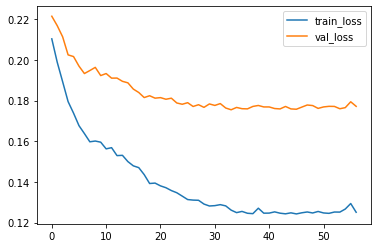

In [27]:
if args.mode == 'train':
    if args.type == 'daily':
        train_loss_info, val_loss_info = train_daily()
        # training loss trend and validation loss trend
        plt.figure(1)
        plt.plot(train_loss_info, label='train_loss')
        plt.plot(val_loss_info, label='val_loss')
        plt.legend(loc='best')
        plt.show()
    if args.type == 'weekly':
        train_loss_info, val_loss_info = train_weekly()
        # training loss trend and validation loss trend
        plt.figure(1)
        plt.plot(train_loss_info, label='train_loss')
        plt.plot(val_loss_info, label='val_loss')
        plt.legend(loc='best')
        plt.show()

In [28]:
if args.mode == 'test':
    if args.type == 'daily':
        trainloader, train_x, train_y, validation_x, validation_y, \
        test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate_daily()
        # path = 'checkpoint_1.tar'
        path = 'checkpoint_daily.tar'
        test_daily(path, test_x, test_y, train_y_mean, train_y_std)
    if args.type == 'weekly':
        # path = 'checkpoint_2.tar'
        path = 'checkpoint_weekly_sequential.tar'
        trainloader, train_x, train_y, validation_x, validation_y, \
        test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate()
        test_weekly(path, test_x, test_y, train_y_mean, train_y_std)

In [29]:
# daily_predict_4_day_avg.py
# This part is to predict number of new cases
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

day_input = 6
timelagging = 6
average_num = 4
feature_num = 14+2*(day_input-1)

def predict_dataset_daily():
    """ 
    read in data and process, this part is very similar to lstm_1.py  
    return:community,data_x,data_x_mean,data_x_std,date_list_new
    """
    # filename = "LA_daily_predict.csv"
    community_daily = LA_daily_predict.copy()
    # pd.read_csv(filename, encoding="ISO-8859-1", dtype={'ZIP': str, 'date': str})
    community = community_daily['ZIP']
    date = community_daily['date']  # we have to preserve the date
    del community_daily['ZIP']
    del community_daily['date']
    community_daily = pd.DataFrame(community_daily, dtype=float)  # change the type from 'int' to 'float'
    community_daily['ZIP'] = community
    community_daily['date'] = date  # add date back

    data_dict = {}  # key: 'community', value: feature that belong to the key
    for i, community in enumerate(community_daily[:]['ZIP']):
        if community not in data_dict:
            data_dict[community] = []
        feature = []
        for f in community_daily.iloc[i]:
            feature.append(f)
        data_dict[community].append(feature)

    community = []  # save 'community' correlating to input point
    date = []     # save 'date' correlating to input point

    data_x = []  # input
    for key, values in data_dict.items():
        l = len(values)
        input_num = l - timelagging - average_num
        feature = []
        input_num=input_num+5
        for i in range(input_num):
            first = True
            for j in range(day_input):
                if first:
                    community.append(values[i][-2])   # save 'community' correlating to ont input point
                    date.append(values[i][-1])      # save 'date' correlating to ont input point
                    # because we add 'date' back, the last feature is values[i][:-5] not values[i][:-4]
                    for k in values[i][:-3]:
                        feature.append(k)
                    first = False
                else:
                    feature.append(values[i + j][0])
                    feature.append(values[i + j][1])
            tmp = []
            tmp.append(feature)
            data_x.append(tmp)  # one input point
            feature = []

    data_x_ls = []
    for j in data_x:
        for i in j:
            data_x_ls.append(i)
    data_x_df = pd.DataFrame(data_x_ls)
    data_x_mean = data_x_df.mean()  # train dataset mean
    data_x_std = data_x_df.std()    # train dataset std

    for i in range(len(data_x)):    # using train_x mean and train_x std to normalize
        for j in range(len(data_x[i])):
            for k in range(len(data_x[i][j])):
                data_x[i][j][k] = (data_x[i][j][k] - data_x_mean[k]) / data_x_std[k]

    data_x = torch.tensor(data_x)

    date_list_new = []
    for date_ in date:
        date_start = (date_+datetime.timedelta(days=6)).strftime("%Y-%m-%d")
        date_end = (date_+datetime.timedelta(days=9)).strftime("%Y-%m-%d")
        date_list_new.append(date_start+' - ' + date_end)
    return community,data_x,data_x_mean,data_x_std,date_list_new

community,data_x,data_x_mean,data_x_std,date_list_new = predict_dataset_daily()

In [30]:
"""     scale the output value back to its original size and cal the loss   """
def upscale(predict,data_x_std,data_x_mean):
    x = predict[:]
    for i in range(len(predict)):
        x[i][0] = x[i][0] * torch.tensor(data_x_std[1]) + torch.tensor(data_x_mean[1])
    return x

"""     define LSTM model   """
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # if batch_first=True, then input shape = (batch, seq, shape)
        self.lstm = torch.nn.LSTM(input_size=feature_num, hidden_size=64, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(64 * 1, 32)
        self.linear1 = torch.nn.Linear(32, 1)

    def forward(self, x):
        # print(x.shape)
        x, _ = self.lstm(x)
        x = x.reshape(-1, 64 * 1)
        x = self.linear(x)
        x = self.linear1(x)
        return x


model = Net()
path = 'checkpoint_latest.tar'
# load from file
checkpoint = torch.load(path)
model.load_state_dict(checkpoint['net'])
model.eval()
predict = np.array(model(data_x).data)  # output
predict_upscale = upscale(predict,data_x_std,data_x_mean)      # original scale output

In [31]:
def processOutput(community,date_list_new,predict_upscale):
    """
    Organize the output dataframe
    arg: Region name, Timestamp, Predicted new cases
    return: an output dataframe with risk score
    """
    out = pd.DataFrame()                            # generate table
    out['Region'] = community                            # zip code column
    out['Timestamp'] = date_list_new    # date column
    out['Predicted new cases'] = predict_upscale     # predicted new cases columns
    out['Risk_score_level']=None
    # read population data
    url5="https://raw.githubusercontent.com/skasralikar/Risk-Score-1-UMichZJU/master/data/input/LApopulation.csv"
    pop = pd.read_csv(url5, index_col = False)  # population data
    # calculate the risk score
    # risk score=Predicted new cases*10000/population size
    for i in range(out.shape[0]):
        for j in range(pop.shape[0]):
            if (out.at[i,'Region'] == pop.at[j,'ZIP']):
                out.at[i,'Risk_score'] = 10000 * out.at[i,'Predicted new cases'] / pop.at[j,'population']

    # delete the col 'predicted new cases'
    out=out.drop(columns=['Predicted new cases'])
    # set the first day of predicted period as 'Timestamp'
    for i in range(len(out)):
        out.loc[i,'Timestamp']=out.loc[i,'Timestamp'][0:11]
    return out

def riskScoreLevel(out):
    """
    defind the risk score level
    return: output dataframe with risk score level
    """
    # -1-no data
    # 0-very low level(risk score <=0.1)
    # 1-low level(0.1<risk score <=1)
    # 2-medium level(1<risk score <=2)
    # 3-high level(risk score >2)
    for i in range(len(out)):
        if out['Risk_score'][i]<=0.1:
            out.loc[i,'Risk_score_level']=0
        elif out['Risk_score'][i]<=1:
            out.loc[i,'Risk_score_level']=1
        elif out['Risk_score'][i]<=2:
            out.loc[i,'Risk_score_level']=2
        else:
            out.loc[i,'Risk_score_level']=3
    return out

out0=processOutput(community,date_list_new,predict_upscale)
out=riskScoreLevel(out0)

In [32]:
out.head(10)

,Region,Timestamp,Risk_score_level,Risk_score
0,Acton,2020-04-09,0,-2.586759
1,Acton,2020-04-10,0,-4.175625
2,Acton,2020-04-11,0,-3.215393
3,Acton,2020-04-12,0,-1.198451
4,Acton,2020-04-13,0,-0.494658
5,Acton,2020-04-14,0,-0.243450
6,Acton,2020-04-15,0,-1.018354
7,Acton,2020-04-16,0,-2.126586
8,Acton,2020-04-17,0,-3.400035
9,Acton,2020-04-18,0,-0.272721


In [33]:
Aug01=out.loc[out['Timestamp']=='2020-08-01 ']
Aug01.head(10)

,Region,Timestamp,Risk_score_level,Risk_score
109,Acton,2020-08-01,0,-3.013032
240,Agoura Hills,2020-08-01,0,-0.546034
378,Alhambra,2020-08-01,2,1.359222
513,Altadena,2020-08-01,1,0.889566
651,Arcadia,2020-08-01,1,0.397523
780,Arleta,2020-08-01,3,3.114917
821,Avalon,2020-08-01,0,-7.634440
949,Azusa,2020-08-01,3,3.588376
1086,Baldwin Hills,2020-08-01,2,1.042951
1209,Baldwin Park,2020-08-01,3,3.660312


In [34]:
out.to_csv('LA_daily_out.csv')